# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False) 
# X is a 2D array of 70000, 784 value pixel values
# Y is a 1D array of the labels


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this # permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0])) # shuffle data from census bureau and high school students
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000] # What is this for?

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

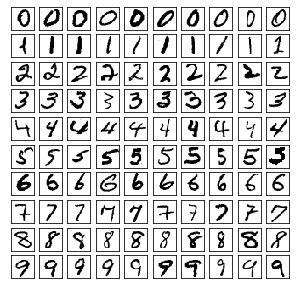

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

# Plot size
plt.figure(figsize=(5,5))
# For each image from 1 to 100
for i in range(100):
    # Define plot space
    plt.subplot(10,10,i+1)
    # Remove grids
    plt.grid(False)
    # Remove x & y ticks
    plt.xticks([])
    plt.yticks([])
    
    # map values from 0-99 -> 0-9
    # for i=1-9, j=0; i=10-19, j=1; i=20-29, j=2; i=30-39, j=3; i=40-49, j=4,
     # i=50-59, j=5; i=60-69, j=6; i=70-79, j=7; i=80-89, j=8; i=90-99, j=9
    j = i//10
    # Plot images
    plt.imshow(np.reshape(train_data[train_labels == str(j)][i],(28,28)),
               cmap="binary")
    # Labels
#     plt.xlabel(str(j))
plt.show()

### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
#def P2(k_values):

### STUDENT START ###
# Initialize K values with list
k_values = range(1,10,2)

# Initialize empty list for performances of each algorithm
performances = []

# Format output with dashes
print("-"*25)
# 1. For each value of k in the k-Nearest Neighbor (k-NN) classifier
for k in range(1, 10, 2):
    # Train each k-NN model with the current value of k, 1, 3, 5, 7, or 9
    kNN = KNeighborsClassifier(n_neighbors=k) # model object
    # Fit model with mini train data
    kNN.fit(mini_train_data, mini_train_labels)
    
# 2. Assess model performance/accuracy with development data
    PerformanceScore = kNN.score(dev_data, dev_labels)
    # Express performace/accuracy as percentage
    print("k={0}, performance={1:.2f}%".format(k, PerformanceScore * 100))
    # Generate list of performances/accuracies for each classifier with k-nearest neighbors
    performances.append(PerformanceScore)
    
# 3. Identify k with the best performance/highest accuracy
p = int(np.argmax(performances))
print("-"*25)
print("\nk={0} achieved highest accuracy of {1:.2f}% on the validation data (dev data)"\
      .format(k_values[p],
performances[p] * 100))

# 4. Determine precision, recall, and F1 for each label
# Retrain k-NN classifier with k=1
k_1 = KNeighborsClassifier(n_neighbors=1)
# Fit model with mini train data
k_1.fit(mini_train_data, mini_train_labels)

# Predict labels with dev_data ?
predictions = k_1.predict(dev_data)

# Precision, recall, and F1 with dev_labels?
print("-"*25)
print("\nReport")
print(classification_report(dev_labels, predictions))
    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

-------------------------
k=1, performance=88.40%
k=3, performance=87.60%
k=5, performance=88.20%
k=7, performance=87.70%
k=9, performance=87.50%
-------------------------

k=1 achieved highest accuracy of 88.40% on the validation data (dev data)
-------------------------

Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg   

ANSWER:

It depends on how one interprets a "difficult digit". If a difficult digit is one with low precision- for example, one that was called a "3" if it was a "5", then number "9" is the most difficult digit. If, conversely, a difficult digit is one with low recall- for example, one where not all samples were identified, then number "8" is the most difficult digit. Finally, if the most difficult digit is one with a combination of both low precision and low recall, as expressed by the F1 score, then number "8" is, again, the most difficult digit. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
# Initialize empty list for performances of each algorithm
performances_k1 = []

# Initialize list for different training data sets, n
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

# Start the clock
start = time.time()

# 1. For each value of n in the training dataset
for n in train_sizes:
    # Train each k-NN model with k=1
    kNN = KNeighborsClassifier(n_neighbors=1) # model object
    # Fit model with train data
    kNN.fit(train_data[:n], train_labels[:n])

    
# 2. Assess model performance/accuracy with development data
    # Performance object
    PerformanceScore_k1 = kNN.score(dev_data, dev_labels)
    # Times
    elapsed_time = (time.time() - start) # Is this time of performance OR total time?
    # Express performace/accuracy as percentage
    print("n={0}, performance={1:.2f}, in {2:.2f} seconds"\
          .format(n, PerformanceScore_k1 * 100, elapsed_time))
    # Generate list of performances/accuracies for each classifier with k-nearest neighbors
    performances_k1.append(PerformanceScore_k1)

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

n=100, performance=70.20, in 0.12 seconds
n=200, performance=79.10, in 0.33 seconds
n=400, performance=81.10, in 0.73 seconds
n=800, performance=86.60, in 1.50 seconds
n=1600, performance=90.50, in 3.18 seconds
n=3200, performance=92.70, in 6.44 seconds
n=6400, performance=93.90, in 13.31 seconds
n=12800, performance=95.20, in 26.93 seconds
n=25600, performance=96.30, in 53.40 seconds


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

--------------------------------------------------
Model with raw training data set sizes
--------------------------------------------------


-Accuracy (y) as a linear function of training data sizes (x): y = 0.83 + 0.00000669x

-The coefficient of determination, R²=0.42

-Predicted accuracies for training data sizes of:
 60000: 1.24
 120000: 1.64
 1000000: 7.52


--------------------------------------------------
Model with transformed performances (Y/1-Y)
--------------------------------------------------

-Accuracy (y) as a linear function of transformed training data sizes (x): y=6.17 + 0.00x

-The coefficient of determination, R²=0.86

-Predicted accuracies for transformed training data sizes of:
 60000: 0.98
 120000: 0.99
 1000000: 1.00


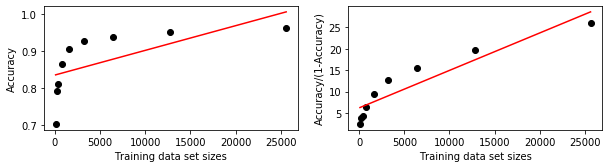

In [6]:
#def P4():

### STUDENT START ###

# Print divider for transformed data
print("-"*50)
print("Model with raw training data set sizes")
print("-"*50)
print("\n")

# 1. Convert lists of training data sizes and performaces to arrays
TrainSizes = np.array(train_sizes)
Performances = np.array(performances_k1)
# Convert X, training data sample sizes, into feature vector
TrainSizes = TrainSizes[:, np.newaxis]

# 2. Create OLS object with intercept and fit model
LR = LinearRegression(fit_intercept=True).fit(TrainSizes, Performances)
# Model intercept and coefficient.
print('-Accuracy (y) as a linear function of training data sizes (x): y = {0:.2f} + {1:.8f}x'\
      .format(LR.intercept_, LR.coef_[0]))
# R^2
print("\n-The coefficient of determination, R\u00b2={0:.2f}"\
      .format(LR.score(TrainSizes, Performances)))

# 3. Predict accuracies from new training data set sizes
# Training dataset sizes
predictions = np.array([60000,120000,1000000])
# Rearrange
predictions = predictions[:, np.newaxis]
# Predict
Predictions = LR.predict(predictions)
print("\n-Predicted accuracies for training data sizes of:\n 60000: {0:.2f}\n 120000: {1:.2f}\n 1000000: {2:.2f}"\
      .format(Predictions[0],Predictions[1],Predictions[2]))

# 4. Plot raw data
# Plot size
plt.figure(figsize=(10,5))
plt.figure(1)
# Plot
plt.subplot(221)
# Scatterplot
plt.plot(TrainSizes, Performances, 'o', color='black')
# Predicted surface
plt.plot(TrainSizes, LR.predict(TrainSizes), color = 'red')
# Axes
plt.xlabel('Training data set sizes')
plt.ylabel('Accuracy')

# Print divider for transformed data
print("\n")
print("-"*50)
print("Model with transformed performances (Y/1-Y)")
print("-"*50)

# 5. Transform training set data 
T_Performances = Performances/(1-Performances)

# 6. Refit model
T_LR = LinearRegression(fit_intercept=True).fit(TrainSizes, T_Performances)
# Model intercept and coefficient.
print('\n-Accuracy (y) as a linear function of transformed training data sizes (x): y={0:.2f} + {1:.2f}x'\
      .format(T_LR.intercept_, T_LR.coef_[0]))
# R^2
print("\n-The coefficient of determination, R\u00b2={0:.2f}"\
      .format(T_LR.score(TrainSizes, T_Performances)))

# 7. Predict accuracies from new training data set sizes
# Predict
Predictions = T_LR.predict(predictions)
# Untransform predictions
print("\n-Predicted accuracies for transformed training data sizes of:\n 60000: {0:.2f}\n 120000: {1:.2f}\n 1000000: {2:.2f}"\
      .format((Predictions[0]/(1+Predictions[0])),
              (Predictions[1]/(1+Predictions[1])),
              (Predictions[2]/(1+Predictions[2]))))

# 8. Plot transformed data
# Plot
plt.subplot(222)
# Scatterplot
plt.plot(TrainSizes, T_Performances, 'o', color='black')
# Predicted surface
plt.plot(TrainSizes, T_LR.predict(TrainSizes), color = 'red')
# Axes
plt.xlabel('Training data set sizes')
plt.ylabel('Accuracy/(1-Accuracy)');

### STUDENT END ###

#P4()

ANSWER:
There are several problems in applying a linear regression model to these data:
* the data are not linear so they violate the linear assumption of the predictive surface.
* prediction of accuracies is poor with the in-sample data
* prediction of accuracies is poor and non-sensical with the out-of-sample data
* predictions of performance with exceptionally large training sets are > 1 or 100% and therefor violate our intuitions and rules about percentages.

To resolve the latter issues, the data were transformed with Y/(1-Y)

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.


 Raw confusion matrix
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

 Normalized confusion matrix
[[0.95 0.   0.01 0.   0.   0.   0.01 0.01 0.02 0.  ]
 [0.   0.98 0.01 0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.03 0.79 0.02 0.02 0.   0.02 0.04 0.06 0.01]
 [0.   0.02 0.   0.87 0.   0.07 0.   0.02 0.03 0.  ]
 [0.   0.   0.01 0.   0.85 0.   0.   0.02 0.   0.12]
 [0.02 0.   0.   0.01 0.01 0.88 0.05 0.   0.02 0.  ]
 [0.01 0.02 0.01 0.   0.01 0.02 0.92 0.   0.01 0.  ]
 [0.   0.01 0.01 0.   0.   0.   0.   0.94 0.   0.04]
 [0.01 0.04 0.04 0.03 0.01 0.03 0.   0.01 0.77 0.04]
 [0.   0.01 0.   0.   0.03 0.02 0.   0.

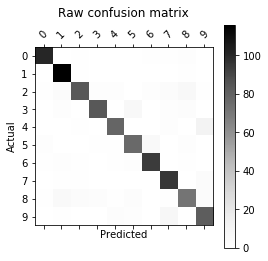

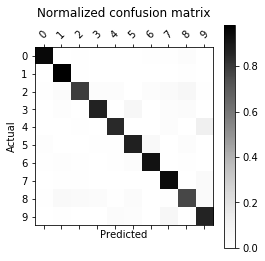

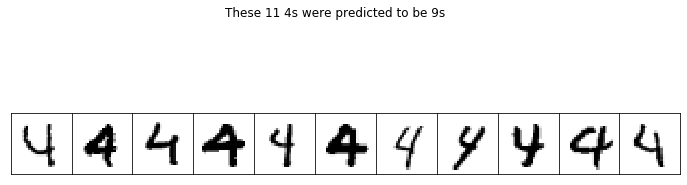

In [7]:
#def P5():

### STUDENT START ###
# 1. Fit 1-NN model
kNN_1 = KNeighborsClassifier(n_neighbors=1) # model object
# Fit model with mini train data
kNN_1.fit(mini_train_data, mini_train_labels)

# 2. Assess model performance/accuracy with development data
# Performance object
PerformanceScore_k1 = kNN_1.score(dev_data, dev_labels)

# 3. Predictions with development data
Predictions_k1 = kNN_1.predict(dev_data)

# 4. Raw Confusion matrix
CM = confusion_matrix(dev_labels, Predictions_k1,
                 labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
# Print
print("\n Raw confusion matrix")
print(CM)

# 5. Visualize raw matrix
plt.matshow(CM, cmap='Greys') # imshow
plt.title("Raw confusion matrix\n")
plt.colorbar()
tick_marks = np.arange(len(CM))
plt.xticks(tick_marks, range(0,10), rotation=45)
plt.yticks(tick_marks, range(0,10))
plt.xlabel('Predicted')
plt.ylabel('Actual');


# 6. Normalized confusion matrix
print("\n Normalized confusion matrix")
NCM = [i/np.sum(CM, axis = 1) for i in CM]
# Convert to array
NCM = np.array(NCM)
# Matrix
np.set_printoptions(precision=2)
print(NCM)

# 7. Visualize normalized confusion matrix
plt.matshow(NCM, cmap='Greys') # imshow
plt.title("Normalized confusion matrix\n")
plt.colorbar()
tick_marks = np.arange(len(NCM))
plt.xticks(tick_marks, range(0,10), rotation=45)
plt.yticks(tick_marks, range(0,10))
plt.xlabel('Predicted')
plt.ylabel('Actual');

# 8. Grab 4s that are mistaken as 9s and 9s that are mistakens as 4s
FourOrNine = dev_data[(Predictions_k1 != dev_labels) &\
                      ((dev_labels == "4") & (Predictions_k1 == "9"))]
#                       ((dev_labels == "4") | (dev_labels == "9"))]

# 9. Visualize 4s and 9s
# Unpack subplots tuple into fig and axs
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(12,4))
# Remove extra space
fig.subplots_adjust(hspace=0, wspace=0)
# Flatten axes
axs = axs.ravel()
# For each plot in the range of 200 plots
for i in range(11):
    # Plot each digit
    axs[i].imshow(np.reshape(FourOrNine[i],(28,28)),
       cmap="binary")
    # Remove ticks from x and y axes
    axs[i].set_xticks([], []) 
    axs[i].set_yticks([], [])
# Title
fig.suptitle('These 11 4s were predicted to be 9s');


### STUDENT END ###

#P5()

In [12]:
type(dev_labels)

numpy.ndarray

In [ ]:
FourOrNine = dev_data[(Predictions_k1 != dev_labels) &\
                      ((dev_labels == "4") & (Predictions_k1 == "9"))]

ANSWER: 

- The model confuses 4s with 9s more often than it confuses other digits. 
- In other words, when the actual digit is a 4, the algorithm classifies them as 9s.
- More specifically, the model classifies 4s as 9s $12$%$ $ of the time (see normalized confusion matrix or heatmap above).
- Interestingly (and sensically) the model only classifies 9s as 4s $3$%$ $ of the time it is classifying 9s.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Produce four 1-Nearest Neighbor models by applying your blur filter in four ways:

- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models.

Notes:

- Train on the (filtered) mini train set.
- Evaluate performance on the (filtered) dev set.
- There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
# def P6():
    
### STUDENT START ###

# 1. Convert 1000 x 784 mini train data & dev data into 1000 x 28 x 28 images
MiniTrainData = np.array([np.reshape(i,(28,28)) for i in mini_train_data])
DevData = np.array([np.reshape(i,(28,28)) for i in dev_data])

# 2. Gaussian distribution function
def NormalDistribution(x, mu, std):
    '''Define function to compute kernel from univariate normal distribution
    Takes 3 arguments:
        - x: input
        - mu: mean
        - std: standard deviation
    Returns the density with the specified parameters'''
    return 1 / (std * np.sqrt(2 * np.pi)) * np.e ** (-np.power((x - mu) / std, 2) / 2)

# 3. Gaussian filter function
def GaussianFilter(n, sigma):
    '''Define function that creates Gaussian Filter
    Takes 2 arguments:
        - n: size of the kernel (assuming its a nxn matrix)
        - sigma: standard deviation
    Returns nxn array with to be used for modification (blurring or sharpening)'''
    # Create one dimensional vector with evenly spaced values
    Kernel1D = np.linspace(-(n//2), n//2, n)
    # For each value in the kernel size
    for i in range(n):
        # Replace value with density function with with mean 0 and sigma
        Kernel1D[i] = NormalDistribution(Kernel1D[i], 0, sigma)
    # Replace pixel with outer product of transposed 1D kernel  
    GaussianFilter.Kernel2D = np.outer(Kernel1D.T, Kernel1D.T)
    # Replace the kernel with 1/ max of the kernel
    GaussianFilter.Kernel2D *= 1.0 / GaussianFilter.Kernel2D.max()
    # Return 2S kernel array
    return GaussianFilter.Kernel2D

# 4. Convolution function
def Convolve2D(image, kernel, n):
    '''Define function that convolves image
    Takes two arguments:
        - image: array of pixel values
        - kernel: smaller array with weights for blurring
        - n: size of kernel
    Returns:
        - a convolved image/array'''
    # Instantiate convolved image output with array of 0 the size of the image
    ConvImage = np.zeros_like(image)           
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel)) 
    # Add zeros as insulation/padding to the input image
    ImagePadding = np.zeros((image.shape[0] + 2, image.shape[1] + 2)) 
    # Define image as padded image
    ImagePadding[1:-1, 1:-1] = image
    # For every pixel in the image
    for i in range(image.shape[1]):     
        # For every pixel in the second dimension
        for j in range(image.shape[0]):
            # Sum the products of each pixel/element in the image by the kernel
            ConvImage[j,i]=(kernel*ImagePadding[j:j+n, i:i+n]).sum()      
    # Return the image
    return ConvImage


# 5. Call Gaussian Filter function
GaussianFilter(3, 2.7) 

# 6. Blur images of training (mini_train_data) and testing data (dev_data)
BlurredMiniTrainData = np.array([Convolve2D(MiniTrainData[i], GaussianFilter.Kernel2D, 3)\
                                for i in range(MiniTrainData.shape[0])])
BlurredDevData = np.array([Convolve2D(DevData[i], GaussianFilter.Kernel2D, 3)\
                                for i in range(DevData.shape[0])])

# 7. Convert 1000 x 28 x 28 mini train data & dev data into 1000 x 784 images
blurred_mini_train_data = np.array([np.reshape(i,(784)) for i in BlurredMiniTrainData])
blurred_dev_data = np.array([np.reshape(i,(784)) for i in BlurredDevData])

# 8. Fit 1-NN on nonfiltered data
# Model object
NN_1 = KNeighborsClassifier(n_neighbors=1) 
# Fit model with mini train data
NN_1.fit(mini_train_data, mini_train_labels)
# Assess model performance/accuracy with development data
# Performance object
PerformanceNN_1 = NN_1.score(dev_data, dev_labels)

# 9. Fit 1-NN on filtered training data and nonfiltered dev data
# Model object
NN_2 = KNeighborsClassifier(n_neighbors=1) 
# Fit model with mini train data
NN_2.fit(blurred_mini_train_data, mini_train_labels)
# 9 Assess model performance/accuracy with development data
# Performance object
PerformanceNN_2 = NN_2.score(dev_data, dev_labels)

# 10. Fit 1-NN on nonfiltered training data and filtered dev data
# Model object
NN_3 = KNeighborsClassifier(n_neighbors=1) 
# Fit model with mini train data
NN_3.fit(mini_train_data, mini_train_labels)
# 9 Assess model performance/accuracy with development data
# Performance object
PerformanceNN_3 = NN_3.score(blurred_dev_data, dev_labels)

# 11. Fit 1-NN on filtered training data and filtered dev data
# Model object
NN_4 = KNeighborsClassifier(n_neighbors=1) 
# Fit model with mini train data
NN_4.fit(blurred_mini_train_data, mini_train_labels)
# 9 Assess model performance/accuracy with development data
# Performance object
PerformanceNN_4 = NN_4.score(blurred_dev_data, dev_labels)

# 12 Compare accuracies
print("The accuracies of the 1-NN model with:\
    \n -nonfiltered training data and nonfiltered dev data = {0:.2f}%\
    \n -filtered training data and nonfiltered dev data = {1:.2f}%\
    \n -nonfiltered training data and filtered dev data = {2:.2f}%\
    \n -filtered training data and filtered dev data = {3:.2f}%\
    ".format(PerformanceNN_1*100,
            PerformanceNN_2*100,
            PerformanceNN_3*100,
            PerformanceNN_4*100))

### STUDENT END ###

# #P6()

The accuracies of the 1-NN model with:    
 -nonfiltered training data and nonfiltered dev data = 88.40%    
 -filtered training data and nonfiltered dev data = 16.50%    
 -nonfiltered training data and filtered dev data = 66.50%    
 -filtered training data and filtered dev data = 90.50%    


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
#def P7():

### STUDENT START ###

'''First model where pixels follow a Bernoulli distribution
   and are mapped to white or black with 0.1 threshold
   Sensu stricto, pixels with values of 0 are white,
   and values > 0 are, in the binary case, black'''

# 1. Make copies of data arrays first

# Bernoulli
mini_train_dataB = mini_train_data.copy()
mini_train_labelsB = mini_train_labels.copy()
dev_dataB = dev_data.copy()
dev_labelsB = dev_labels.copy()

# Multinomial
mini_train_dataM = mini_train_data.copy()
mini_train_labelsM = mini_train_labels.copy()
dev_dataM = dev_data.copy()
dev_labelsM = dev_labels.copy()

# 2. Create first model object
# Sensu stricto, anything not white (>0.1 if we round) is "black"
NB_B = BernoulliNB(binarize=0.1) 
# Fit model
NB_B.fit(mini_train_dataB, mini_train_labelsB)
# Score
PerformanceNB = NB_B.score(dev_dataB, dev_labelsB)
# Performance
print("Accuracy of Naive Bayes with:\n")
print("Bernoulli probability distribution is {0:.1f}%"\
      .format(PerformanceNB*100))

# 3. Map pixels to white, gray, or black for multinomial model
'''Second model where pixels follow a Multinomial distribution
and are mapped to white, gray, or black with at 0, 0.1-9, and 1 respectively'''

# Map pixels < 0.1 to 0, white
mini_train_dataM[(mini_train_dataM < 0.1)] = int(0)
dev_dataM[(dev_dataM < 0.1)] = int(0)

# Map pixels > 0.9 to 2, black
mini_train_dataM[(mini_train_dataM >= 0.9)] = int(2)
dev_dataM[(dev_dataM >= 0.9)] = int(2)

# Map pixels > 0.1 & < 0.9 to 1, grey
mini_train_dataM[(mini_train_dataM >= 0.1) &\
                                (mini_train_dataM < .9)] = int(1)
dev_dataM[(dev_dataM > .1) & (dev_dataM < 0.9)] = int(1)


# 4. Create second model object
NB_M = MultinomialNB()
# Create model object
NB_M.fit(mini_train_dataM, mini_train_labelsM)
# Score
PerformanceM = NB_M.score(dev_dataM, dev_labelsM)
# Performance
print("Multinomial probability distribution is {0:.1f}%".format(PerformanceM*100))

### STUDENT END ###

#P7()

Accuracy of Naive Bayes with:

Bernoulli probability distribution is 81.4%
Multinomial probability distribution is 80.7%


ANSWER:
- No, the multinomial version does not improve the results. In fact, the accuracy drops from 81.4% with the Bernoulli version to 80.7% with the Mulitnomial version.
- Simple is better is this case. A simple model, with only black and white pixels, might enhance the classification power of the model over a model that accomadates > 2 categories, in this case white, grey, and black pixels.
- Moreover, while the Bernoulli model models presence/absence features, the Multinomial model models counts. In other words, the former models occurrences and the latter models frequencies. Although, $sensu\;stricto$, 0,1, and 2 are counts, there is only one more level (2) then the binary case modeled by the Bernoulli model. Perhaps if we expanded the number of levels > 5, 10, 20, etc, the Multinomial model might excel. 
- From this perspective, perhaps we can view the Bernoulli model as a special case of the Multinomial model, at least heuristically.
- Lastly, because the Bernoulli model is simpler than the Multinomial model, perhaps it needs less data to train and is less prone to overfitting.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

For alpha=0.0000000001 accuracy was 81.50%
For alpha=0.0001000000 accuracy was 82.20%
For alpha=0.0010000000 accuracy was 82.20%
For alpha=0.0100000000 accuracy was 82.20%
For alpha=0.1000000000 accuracy was 81.80%
For alpha=0.5000000000 accuracy was 82.00%
For alpha=1.0000000000 accuracy was 81.60%
For alpha=2.0000000000 accuracy was 81.20%
For alpha=10.0000000000 accuracy was 79.00%

The best estimator is alpha = 0.0001 with an accuracy of 82.20%


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


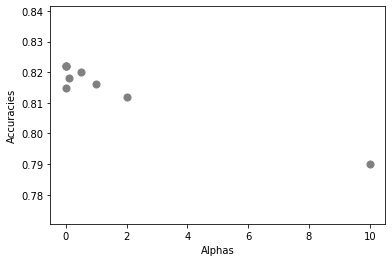

In [10]:
#def P8(alphas):

### STUDENT START ###

# Initialize list for different training data sets, n
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# 1. Exhaustive search object for different values of alpha
NBB = GridSearchCV(BernoulliNB(binarize=0.1), param_grid=alphas, cv=10)

# 2. Search parameter space and fit models
NBB = NBB.fit(mini_train_dataB, mini_train_labelsB)

# 3. Alphas
alp = []
for al in NBB.cv_results_["params"]:
    alp.append(al['alpha'])
    
# 4. Accuracies
acc = []
for ac in NBB.cv_results_["mean_test_score"]:
    acc.append(ac)
    
# 5. Alphas and accuracies
for i, j in zip(alp, acc):
    print("For alpha={0:.10f} accuracy was {1:.2f}%".format(i, j*100)) 
    
# 5. Plot accuracies as a function of alphas
# Scatterplot
plt.scatter(alp, acc, c='grey',s=50)
# Axes
plt.xlabel('Alphas')
plt.ylabel('Accuracies');

# 6. Summarize the results of the grid search
print("\nThe best estimator is alpha = {0:.4f}\
 with an accuracy of {1:.2f}%"\
      .format(NBB.best_estimator_.alpha,
              NBB.best_score_ *100))

                            
### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:
- When alpha = 0.0001, accuracy was $82.2$%, the highest across all values of alpha.
- When alpha is near zero, alpha = 1.0e-10, the accuracy is 81.50%.
    - This satisfies our expectation for data without many rare features values (unique pixel values), although it is less than the best alpha = 0.0001. In other words, this satisfies our expectation for data where features envelope similar values within a class. If some classes were comprised of features with non-zero values for other classes, then we would expect larger alpha values to inflate performance.
    -  By assigning a small, non-zero probabilities, to all features for all classes we avoid cases where rare feature values strongly influence classification by deflating posterior probabilities to 0.
  

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Gaussian Naive Bayes before modification
-------------------------
The accuracy of the Gaussian Naive Bayes model is 59.30%
The accuracy of the Bernoulli Naive Bayes model is 81.40%


//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


Gaussian Naive Bayes after modificaton
-------------------------

The variance smoothing value of 0.061 achieved the highest accuracy of 82.10%


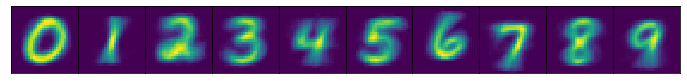

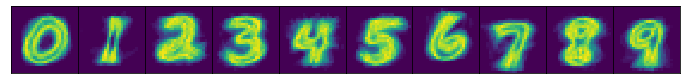

In [21]:
#def P9():

### STUDENT END ###


# 1. Model Object for GNB before fix
GNB = GaussianNB()
# Fit the model
GNB.fit(mini_train_data, mini_train_labels)

# 2.  Accuracy of GNB
AccuracyGNB = GNB.score(dev_data, dev_labels)
print("Gaussian Naive Bayes before modification")
print("-"*25)
print("The accuracy of the Gaussian Naive Bayes model is {0:.2f}%"\
      .format(AccuracyGNB*100))

# 3. Model Object for BNB
BNB = BernoulliNB(binarize=0.1)
# Fit the model
BNB.fit(mini_train_data, mini_train_labels)

# 4.  Accuracy of BNB
AccuracyNB = BNB.score(dev_data, dev_labels)                    
print("The accuracy of the Bernoulli Naive Bayes model is {0:.2f}%"\
      .format(AccuracyNB*100))

# 5. Explore theta: mean of each feature per class
# Plot size
# Unpack subplots tuple into fig and axs
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
# Remove extra space
fig.subplots_adjust(hspace=0, wspace=0)
# Flatten axes
axs = axs.ravel()
# For each plot in the range of 200 plots
for i in range(10):
    # Plot each digit
    axs[i].imshow(GNB.theta_[i].reshape(28, -28))
    # Remove ticks from x and y axes
    axs[i].set_xticks([], []) 
    axs[i].set_yticks([], [])

# 6. Explore sigma: variance of each feature per class
# Plot size
# Unpack subplots tuple into fig and axs
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
# Remove extra space
fig.subplots_adjust(hspace=0, wspace=0)
# Flatten axes
axs = axs.ravel()
# For each plot in the range of 200 plots
for i in range(10):
    # Plot each digit
    axs[i].imshow(GNB.sigma_[i].reshape(28, -28))
    # Remove ticks from x and y axes
    axs[i].set_xticks([], []) 
    axs[i].set_yticks([], [])

# 7. Apply simple fix
# Smoothing parameters: 
# "Portion of the largest variance of all features that is added to variances for calculation stability.
smooth = np.linspace(0,1,100)
# Accuracies
AccuraciesGF = []
# For each smoothing value
for i in smooth:
    # Make a Gaussian Naive Bayes model object
    GNB_f = GaussianNB(var_smoothing = i)
    # Fit a Gaussian Naive Bayes model
    GNB_f.fit(mini_train_data, mini_train_labels)
    # Compute the accuracy for each smoothing parameter
    AccuraciesGF.append(GNB_f.score(dev_data, dev_labels))

    
# 8. Identify the smoothing parameter that maximizes accuracy
print("Gaussian Naive Bayes after modificaton")
print("-"*25)
p = int(np.argmax(AccuraciesGF))
print("\nThe variance smoothing value of {0:.3f} achieved the highest accuracy of {1:.2f}%"\
      .format(smooth[p], AccuraciesGF[p] * 100))
    

### STUDENT END ###

#P9()

ANSWER:
- A variance smoothing parameter was added to the Guassian Naive Bayes model to stabilize calculations.
- For this application, about 6% of the largest variance from all features was added to variances. The effect of this is to homogenize the variability between features and inflate accuracy from $59.30$ to $82.10$%.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

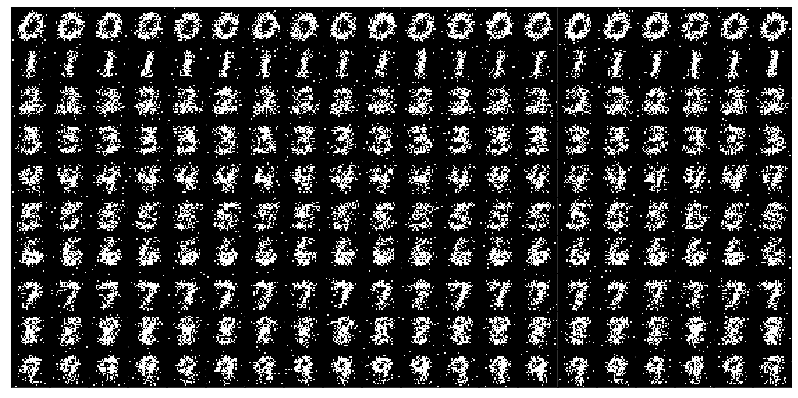

In [12]:
#def P10(num_examples):

### STUDENT START ###
# 1. Model Object for BNB
BNB = BernoulliNB(binarize=0.1)
# Fit the model
BNB.fit(mini_train_data, mini_train_labels)

# 2.  Accuracy of BNB
AccuracyNB = BNB.score(dev_data, dev_labels)                    

# 3. Probability of feature/pixel given a class/digit lable
PixelGivenLabel = np.exp(BNB.feature_log_prob_)
# Repeat it 100x for 1000 total 
PixelGivenLabel = np.tile(PixelGivenLabel,(100,1))

# 4. Convert pixels to black (1) if greater than the randomly generated value
  # or to white (0) if less than the raandomly generate value
NewDigits = (np.where(PixelGivenLabel > np.random.rand(1000,784),1,0))

# 5. Make list of digits
# Start new list
NewDigitData = []
# for each matrix in the array of digits
for m in NewDigits:
    # Append to array
    NewDigitData = np.array(NewDigits)

# 5. Plot (I cheated here. There is definitely a cleaner way to do this)
# Zeroes
ROData0 = [i for i in range(0,200,10)]
Zeros = NewDigits[ROData0]
# Ones
ROData1 = [i for i in range(1,201,10)]
Ones = NewDigits[ROData1]
# Twos
ROData2 = [i for i in range(2,202,10)]
Twos = NewDigits[ROData2]
# Threes
ROData3 = [i for i in range(3,203,10)]
Threes = NewDigits[ROData3]
# Fours
ROData4 = [i for i in range(4,204,10)]
Fours = NewDigits[ROData4]
# Fives
ROData5 = [i for i in range(5,205,10)]
Fives = NewDigits[ROData5]
# Sixes
ROData6 = [i for i in range(6,206,10)]
Sixes = NewDigits[ROData6]
# Sevens
ROData7 = [i for i in range(7,207,10)]
Sevens = NewDigits[ROData7]
# Eights
ROData8 = [i for i in range(8,208,10)]
Eights = NewDigits[ROData8]
# Nines
ROData9 = [i for i in range(9,209,10)]
Nines = NewDigits[ROData9]

# Combine
NewData = np.concatenate((Zeros, Ones, Twos, Threes, Fours,\
                          Fives, Sixes, Sevens, Eights, Nines),
                    axis=0)

# Unpack subplots tuple into fig and axs
fig, axs = plt.subplots(nrows=10, ncols=20, figsize=(14,7))
# Remove extra space
fig.subplots_adjust(hspace=0, wspace=0)
# Flatten axes
axs = axs.ravel()
# For each plot in the range of 200 plots
for i in range(200):
    # Plot each digit
    axs[i].imshow(np.reshape(NewData[i],(28,28)),
       cmap="gray")
    # Remove ticks from x and y axes
    axs[i].set_xticks([], []) 
    axs[i].set_yticks([], [])
### STUDENT END ###

#P10(20)

ANSWER: 
- The generated images are "noisier", less well defined, and very pixelated.
- If forced to manually classify some of the digit images, for example, some of the nines, eights, fours, and twos, one would be hard pressed and would likely misclassify these images.
- Very interesting assignment! Thank you!


### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

p(pred) is 0.0000000000000 to 0.5000000000000 total=0  accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000 total=40  accuracy = 0.500
p(pred) is 0.9000000000000 to 0.9990000000000 total=52  accuracy = 0.327
p(pred) is 0.9990000000000 to 0.9999900000000 total=62  accuracy = 0.565
p(pred) is 0.9999900000000 to 0.9999999000000 total=58  accuracy = 0.569
p(pred) is 0.9999999000000 to 0.9999999990000 total=48  accuracy = 0.771
p(pred) is 0.9999999990000 to 0.9999999999900 total=42  accuracy = 0.762
p(pred) is 0.9999999999900 to 0.9999999999999 total=47  accuracy = 0.787
p(pred) is 0.9999999999999 to 1.0000000000000 total=651  accuracy = 0.945


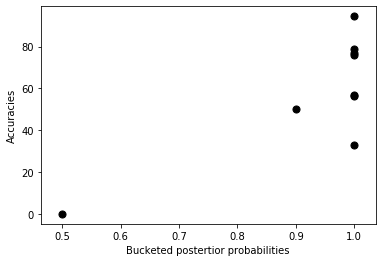

In [13]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
# 1. Model Object for BNB
BNB = BernoulliNB(alpha=0.0001, binarize=0.1)# Alpha from part 8 was used
# Fit the model
BNB.fit(mini_train_data, mini_train_labels)

# 2. Predict labels from data
PredictionsNB = BNB.predict(dev_data)   

# 3. Posterior probability estimates for the dev data
PostProb = BNB.predict_proba(dev_data)

# 4. Extract large posterior probabilities and predicted labels
# List for highest posteriors
HighPosteriors = []
# List of label of highest posterior
PredictedLabels = []
# For each array of size=10 in the posterior probability object
for a in PostProb:
    # Append the highest posterior to the list
    HighPosteriors.append(np.amax(a))
    # Append the label of the highest posterior to a list
    PredictedLabels.append(np.argmax(a))
# Convert lists to arrays
HighPosteriors = np.array(HighPosteriors)
PredictedLabels = np.array(PredictedLabels)
    
# 5. Merge highest posterior probabilities, predicted labels, and actual labels
PostPredAct = tuple(zip(HighPosteriors, PredictedLabels, dev_labels)) 
# Convert to array
PostPredAct = np.array(PostPredAct)
# Convert strings to floats
PostPredAct = PostPredAct.astype(np.float)
DevLabels = np.ndarray.astype(dev_labels, 'int')
     
# 6. Add triples of highest posterior probabilities, predicted labels, and actual labels to appropriate buckets
# List of buckets
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# Correct predictions counter
correct = [0 for i in buckets]
# Total predictions counter
total = [0 for i in buckets]

# 7. Count correct prediction and total predictions
# For each bucket
for b in range(len(buckets)):
    # Correct prediction count 
    correct_count = 0
    # Correct total count
    correct_total = 0
    # For each posterior probability in the dev_data
    for p in range(HighPosteriors.shape[0]):
        # If the posterior is greater than the value of the preceeding bucket
        # and less than or equal to value of the current bucket
        if HighPosteriors[p] > buckets[b-1] and HighPosteriors[p] <= buckets[b]:
            # Add to the correct total
            correct_total += 1
            # if the predicted label equals the actual label
            if PredictedLabels[p] == DevLabels[p]:
                # Add to the correct count
                correct_count += 1
    # Number of correct preditions
    correct[b] = correct_count
    # Total number of predictions
    total[b] = correct_total
 

    
# 8. Display accuracies for each bucket
# List for accuracies
accuracies = []
# For each bucket
for i in range(len(buckets)):
    # Set the accuracy to 0
    accuracy = 0.0
    # if the total is greater than 0
    if (total[i] > 0):
        # Set accuracy to the ratio of correct to total predictions
        accuracy = correct[i] / total[i]
        # Accuracies to list
    accuracies.append(accuracy) 
    # print    
    print('p(pred) is {0:.13f} to {1:.13f} total={2:.0f}  accuracy = {3:.3f}'\
     .format(0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

# 9. Plot accuracies as a function of posterior probabilities
# Scatterplot
plt.scatter(buckets, [i*100 for i in accuracies], c='black',s=50)
# Axes
plt.xlabel('Bucketed postertior probabilities')
plt.ylabel('Accuracies');


### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:
- In the strictest sense, the classifier is "poorly" or "weakly" calibrated, since there is a discrepancy/disagreement between accuracies and the posterior predictions of the predictions. 
- For a strongly calibrated classifer we would expect to see a more or less flat scatter of points when accuracies are expressed as a function of the bucketed posterior probabilities.
- For the data above, we see that accuracy is 0 for the lowest bucket of posteriors, accuracy then increase to $30$ to $50$%, then to $70-80$%, then finally to $94$%. 
- In other words, for the bucket containing posteriors from $0$ to $0.5$, we would expect, for a strongly calibrated classifer, that, at most, $50$% of the samples would be classified correctly. Similarly, the the bucket containing posteriors from $0.5$ to $0.9$, we would expect that, for a strongly calibrated classifier, $50 - 90$% of the samples would be classified correctly. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()